In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hyperstrings.hypergraph import Hypergraph


vertices: set[int] = {0, 1, 2, 3, 4, 5, 6, 7, 8}
vertex_sources: dict[int, set[tuple[int, int]]] = {
    0: set(),
    1: {(0, 0)},
    2: {(1, 0)},
    3: {(2, 1)},
    4: {(3, 0)},
    5: {(2, 0)},
    6: set(),
    7: {(3, 1)},
    8: {(2, 2)}
}
vertex_targets: dict[int, set[tuple[int, int]]] = {
    0: {(0, 0)},
    1: {(2, 0)},
    2: {(2, 1)},
    3: {(3, 0)},
    4: set(),
    5: set(),
    6: {(0, 1)},
    7: set(),
    8: set()#{(1, 0)}
}
vertex_labels: dict[int, str] = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'P', 6: 'Q', 7: 'R', 8: 'S'
}

hyperedges: set[int] = {0, 1, 2, 3}
hyperedge_sources: dict[int, list[int]] = {
    0: [0, 6],
    1: [],#[8]
    2: [1, 2],
    3: [3]
}
hyperedge_targets: dict[int, list[int]] = {
    0: [1],
    1: [2],
    2: [5, 3, 8],
    3: [4, 7]
}
hyperedge_labels: dict[int, str] = {
    0: 'f', 1: 'g', 2: 'h', 3: 'k'
}

inputs: list[int] = [0]
outputs: list[int] = [4, 5]

hypergraph = Hypergraph(
    vertices,
    vertex_sources,
    vertex_targets,
    vertex_labels,
    hyperedges,
    hyperedge_sources,
    hyperedge_targets,
    hyperedge_labels,
    inputs,
    outputs
)

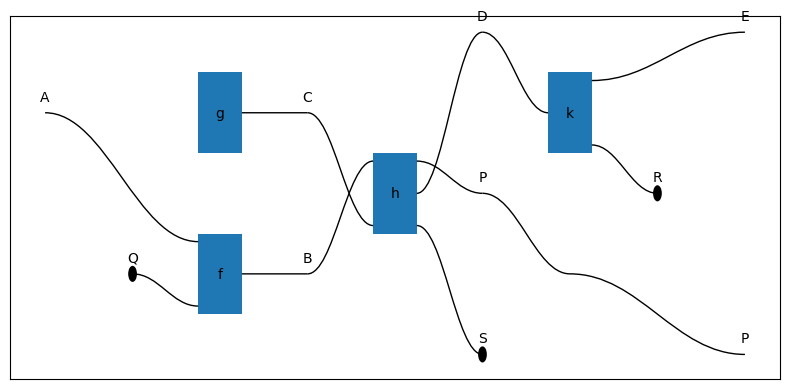

In [3]:
hypergraph.draw_matplotlib()

In [4]:
hypergraph.is_acyclic()

True

In [5]:
vertex_targets[7].add((0, 2))
vertex_targets[8].add((1, 0))
hyperedge_sources[0].append(7)
hyperedge_sources[1].append(8)
cyclic_hypergraph = Hypergraph(
    vertices,
    vertex_sources,
    vertex_targets,
    vertex_labels,
    hyperedges,
    hyperedge_sources,
    hyperedge_targets,
    hyperedge_labels,
    inputs,
    outputs
)

In [6]:
cyclic_hypergraph.is_acyclic()

False

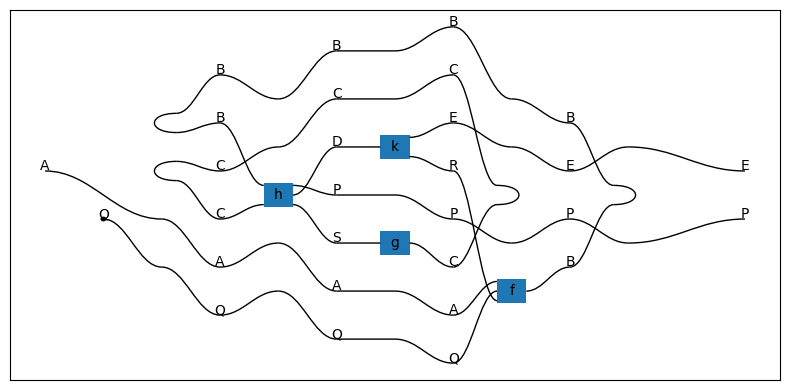

In [7]:
cyclic_hypergraph.make_cycles_explicit().draw_matplotlib()

In [8]:
from hyperstrings.hypergraph import Hypergraph


vertices: set[int] = {0, 1, 2, 3, 4, 5, 6, 7, 8}
vertex_sources: dict[int, set[tuple[int, int]]] = {
    0: set(),
    1: {(0, 0)},
    2: {(0, 1), (1, 0), (1, 1)},
    3: {(2, 1)},
    4: {(3, 0)},
    5: {(2, 0)},
    6: set(),
    7: {(3, 1)},
    8: {(2, 2)}
}
vertex_targets: dict[int, set[tuple[int, int]]] = {
    0: {(0, 0), (1, 0), (2, 1)},
    1: {(2, 0)},
    2: {(2, 2), (3, 1)},
    3: {(3, 0)},
    4: set(),
    5: set(),
    6: {(0, 1)},
    7: set(),
    8: set()
}
vertex_labels: dict[int, str] = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'P', 6: 'Q', 7: 'R', 8: 'S'
}

hyperedges: set[int] = {0, 1, 2, 3}
hyperedge_sources: dict[int, list[int]] = {
    0: [0, 6],
    1: [0],
    2: [1, 0, 2],
    3: [3, 2]
}
hyperedge_targets: dict[int, list[int]] = {
    0: [1, 2],
    1: [2, 2],
    2: [5, 3, 8],
    3: [4, 7]
}
hyperedge_labels: dict[int, str] = {
    0: 'f', 1: 'g', 2: 'h', 3: 'k'
}

inputs: list[int] = [0]
outputs: list[int] = [4, 5]

hypergraph = Hypergraph(
    vertices,
    vertex_sources,
    vertex_targets,
    vertex_labels,
    hyperedges,
    hyperedge_sources,
    hyperedge_targets,
    hyperedge_labels,
    inputs,
    outputs
)

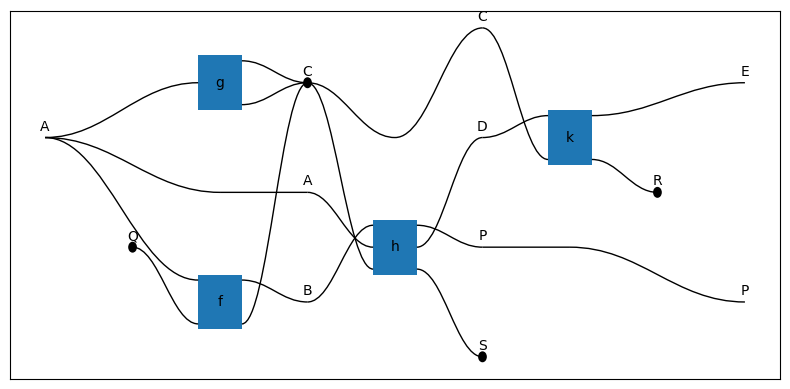

In [9]:
hypergraph.draw_matplotlib()

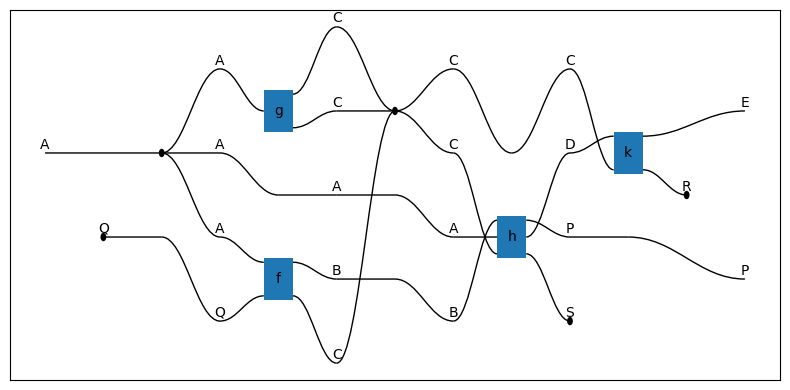

In [10]:
hypergraph.make_spiders_explicit().draw_matplotlib()

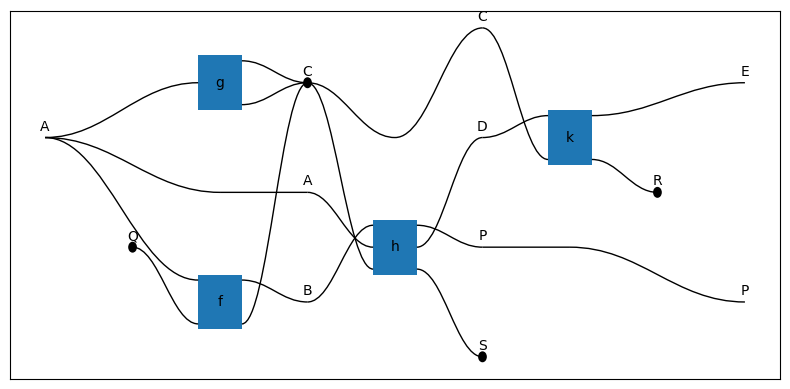

In [11]:
hypergraph.make_spiders_explicit().make_spiders_implicit().draw_matplotlib()

In [12]:
vertex_targets[7].add((0, 2))
hyperedge_sources[0].append(7)
vertex_targets[8].add((1, 1))
hyperedge_sources[1].append(8)
cyclic_hypergraph = Hypergraph(
    vertices,
    vertex_sources,
    vertex_targets,
    vertex_labels,
    hyperedges,
    hyperedge_sources,
    hyperedge_targets,
    hyperedge_labels,
    inputs,
    outputs
)

In [13]:
cyclic_hypergraph.is_acyclic()

False

In [14]:
explicit_spiders = cyclic_hypergraph.make_spiders_explicit()

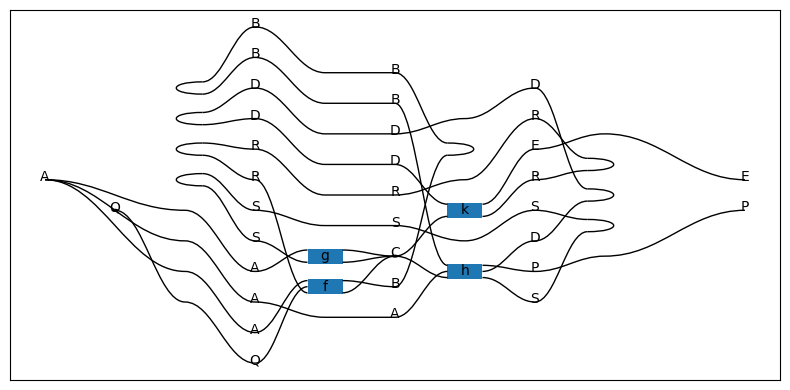

In [15]:
explicit_cycles = explicit_spiders.make_cycles_explicit().make_spiders_implicit()
explicit_cycles.normal_form().draw_matplotlib()

In [ ]:
# constrict cap/cups state pushforward, effect pushback
# explicit permutations
# minimize swaps